### Exercise 1

In [2]:
from bidict import bidict
from datetime import datetime
import numpy as np
from scipy.spatial import distance
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn import datasets, metrics

google = False
data_path = 'G:/My Drive/csc730'

In [3]:
# %matplotlib qt

In [4]:
if google == True:
    from google.colab import drive
    drive.mount('/content/drive')
    !ls "/content/drive/"

In [5]:
X_y = np.load('skewed_MNIST.npy')
X = X_y[:,:-1]
y = X_y[:,-1]
print(X.shape,y.shape)
print(X)

(12244, 784) (12244,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


probability=array([0.01559948, 0.00187847, 0.03128063, 0.50073505, 0.25032669,
       0.0077589 , 0.06256125, 0.0008984 , 0.00383861, 0.12512251]) bins=array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]) counts=array([ 191,   23,  383, 6131, 3065,   95,  766,   11,   47, 1532],
      dtype=int64)


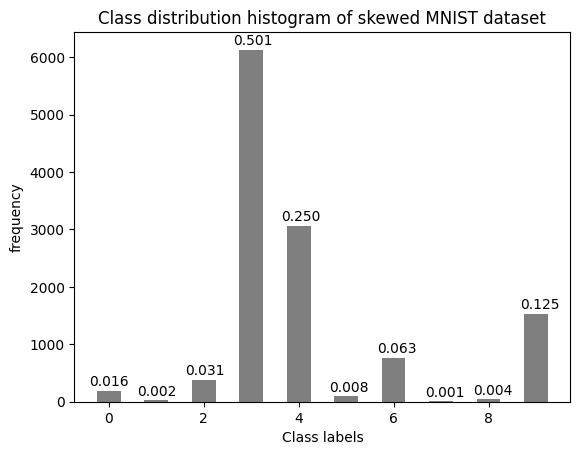

In [6]:
plt.hist(y, bins=np.linspace(0,10,11), align='left', rwidth=0.5, color='black', alpha=0.5)
plt.xlabel('Class labels')
plt.ylabel('frequency')
plt.title('Class distribution histogram of skewed MNIST dataset')

probability, bins = np.histogram(y, bins=np.linspace(0,10,11), density=True)
counts, bins = np.histogram(y, bins=np.linspace(0,10,11))

print(f'{probability=} {bins=} {counts=}')

for i in range(len(probability)):
    plt.text(bins[i]+i/100, counts[i]+30, f'{probability[i]:.3f}', ha='center', va='bottom')

plt.savefig('class_histogram.png', dpi=300)
plt.show()


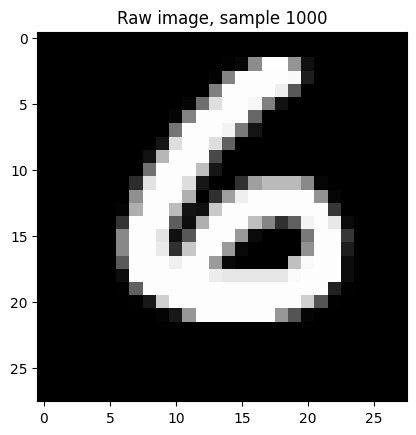

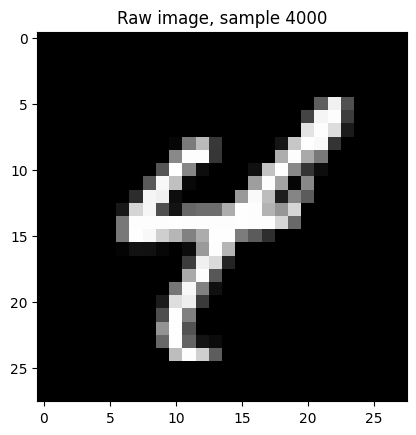

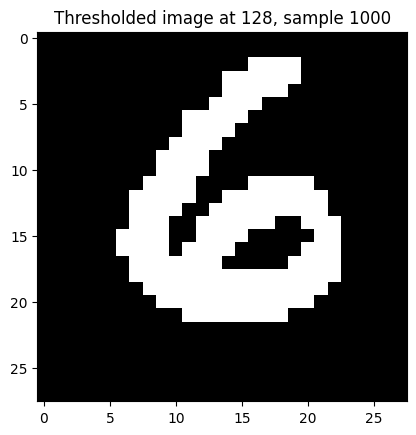

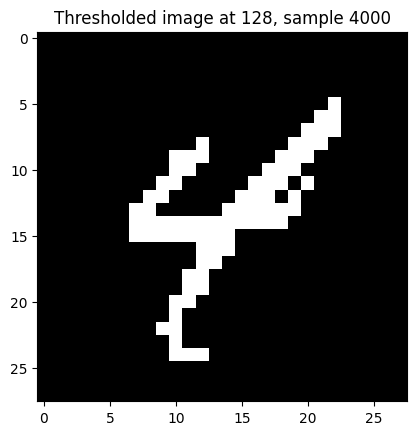

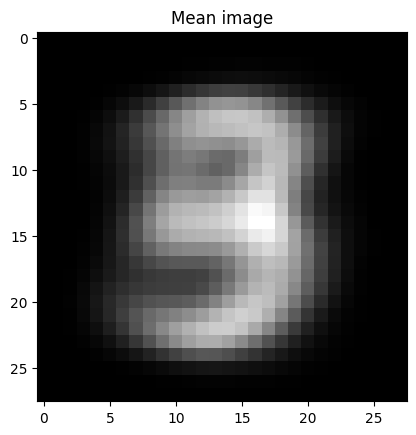

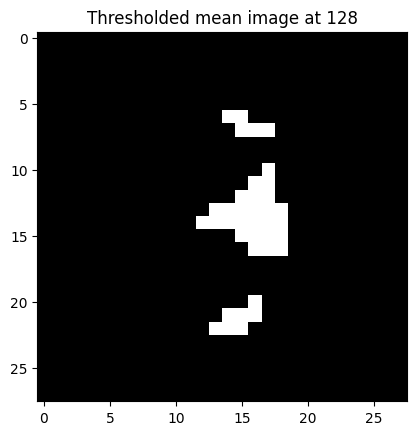

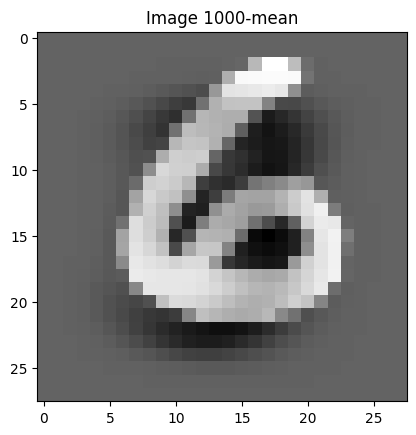

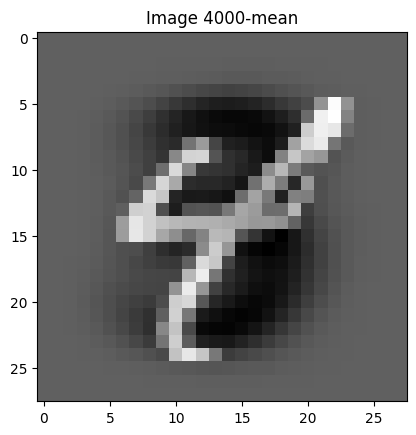

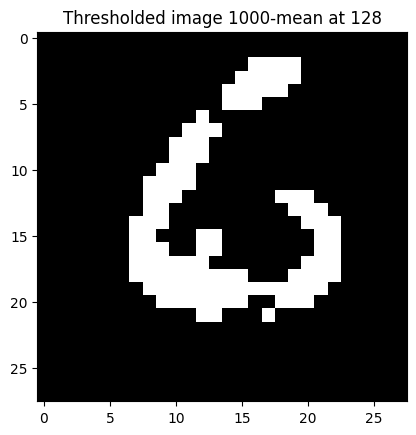

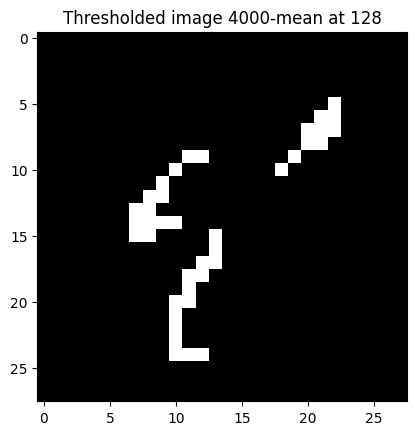

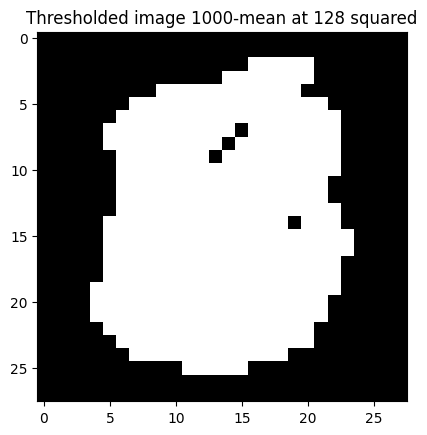

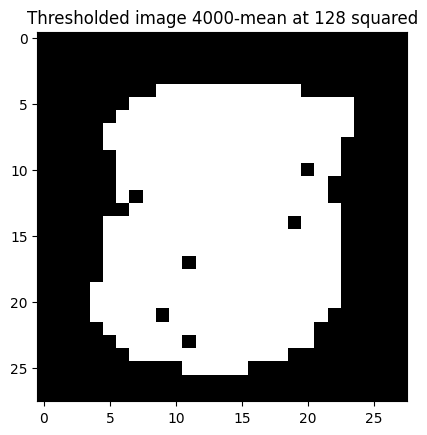

In [7]:
#generate images for the report
#image 1000 and 4000
#plot raw image
#plot thresholded image at 128
#plot mean image, where each pixel is the mean of all images in the dataset
#plot the thresholded mean image at 128
#plot image 1000-mean and 4000-mean
#plot thresholded image 1000-mean and 4000-mean at 128
#plot thresholded image 1000-mean and 4000-mean at 128 squared

#plot raw image
plt.imshow(X[1000].reshape(28,28), cmap='gray')
plt.title('Raw image, sample 1000')
plt.savefig('image1.png')
plt.show()

plt.imshow(X[4000].reshape(28,28), cmap='gray')
plt.title('Raw image, sample 4000')
plt.savefig('image2.png')
plt.show()

#plot thresholded image at 128
plt.imshow(X[1000].reshape(28,28)>128, cmap='gray')
plt.title('Thresholded image at 128, sample 1000')
plt.savefig('image3.png')
plt.show()

plt.imshow(X[4000].reshape(28,28)>128, cmap='gray')
plt.title('Thresholded image at 128, sample 4000')
plt.savefig('image4.png')
plt.show()

#plot mean image, where each pixel is the mean of all images in the dataset
plt.imshow(np.mean(X,axis=0).reshape(28,28), cmap='gray')
plt.title('Mean image')
plt.savefig('image5.png')
plt.show()

#plot the thresholded mean image at 128
plt.imshow(np.mean(X,axis=0).reshape(28,28)>128, cmap='gray')
plt.title('Thresholded mean image at 128')
plt.savefig('image6.png')
plt.show()

#plot image 1000-mean and 4000-mean
plt.imshow(X[1000].reshape(28,28)-np.mean(X,axis=0).reshape(28,28), cmap='gray')
plt.title('Image 1000-mean')
plt.savefig('image7.png')
plt.show()

plt.imshow(X[4000].reshape(28,28)-np.mean(X,axis=0).reshape(28,28), cmap='gray')
plt.title('Image 4000-mean')
plt.savefig('image8.png')
plt.show()
#plot thresholded image 1000-mean and 4000-mean at 128
plt.imshow((X[1000].reshape(28,28)-np.mean(X,axis=0).reshape(28,28))>128, cmap='gray')
plt.title('Thresholded image 1000-mean at 128')
plt.savefig('image9.png')
plt.show()

plt.imshow((X[4000].reshape(28,28)-np.mean(X,axis=0).reshape(28,28))>128, cmap='gray')
plt.title('Thresholded image 4000-mean at 128')
plt.savefig('image10.png')
plt.show()

#plot thresholded image 1000-mean and 4000-mean at 128 squared
plt.imshow(((X[1000].reshape(28,28)-np.mean(X,axis=0).reshape(28,28)))**2>128, cmap='gray')
plt.title('Thresholded image 1000-mean at 128 squared')
plt.savefig('image11.png')
plt.show()

plt.imshow(((X[4000].reshape(28,28)-np.mean(X,axis=0).reshape(28,28)))**2>128, cmap='gray')
plt.title('Thresholded image 4000-mean at 128 squared')
plt.savefig('image12.png')
plt.show()











In [8]:
import scipy.stats as stats
from scipy.signal import find_peaks
# Using only X, come up with some method to assign an "anomalousness score" to each point (from scratch)
def score_random(X):
    return np.random.rand(X.shape[0])

def score_threshold_and_count(X, threshold):
    count = np.sum(X > threshold, axis=1)
    print(count)
    print(np.mean(count))
    score = [(count[i] - np.mean(count)) for i in range(len(count))]
    
    print(score)
    return score

def score_threshold_count_and_square(X, threshold):
    count = np.sum(X > threshold, axis=1)
    print(count)
    print(np.mean(count))
    score = [(count[i] - np.mean(count)) ** 2 for i in range(len(count))]
    print(score)
    return score

def score_single_axis_gaussian(X, mean, std):
    score =  np.sum(np.square(X - mean) / std, axis=1)
    return score

def score_multi_axis_gaussian(X, mean=0, cov=0):
    #X comes in as a 2D array. The 2nd dimension is 784 (28x28)
    #calculate the mean and covariance for the average of the population
    
    #create N x 1 array of scores    
    score = [stats.multivariate_normal.pdf(X[i]) for i in range(X.shape[0])]
    print(score.shape)
    return score
    

def score_fft(X, height=0, threshold=0, distance=36, dc_offset=20, peak_count=4):
    #pad data for 2^n requirement of FFT
    X1 = np.pad(X, ((0, 0), (0,252)), 'constant')
    
    #calculate FFT and PSD
    FFT_all=np.array([np.fft.fft(X1[i][0:1024]) for i in range(X1.shape[0])])
    PSD_all = np.abs(FFT_all)**2    

    scores = np.array([])

    for i in range(X1.shape[0]):        
        # min-max standardization
        data = PSD_all[i][0:512]   
        data = data - np.mean(data)
        data = data / np.std(data)

        #peaks = find_peaks(data[6:], height = 0.005, threshold=0.02, distance=10)     
        #peak_values = np.array([data[peaks[0][i]] for i in range(peaks[0].shape[0])])
        peaks = find_peaks(data[dc_offset:], height = height, threshold=threshold, distance=distance)
 
        peak_values = np.array([peaks[1]['peak_heights'][i] for i in range(peaks[0].shape[0])])
        peaks = peaks[0]+dc_offset

        #choose the top peak_count peaks
        peak_values = peak_values[np.argsort(peak_values)[:peak_count]][::-1]
        peaks = peaks[np.argsort(peak_values)[:peak_count]][::-1]

        anom_x = np.average(peaks)
        anom_y = np.average(peak_values)
                
        anom_x = np.average(peaks)
        anom_y = np.average(peak_values)

        #calculate distance from origin to anom_x, anom_y    
        scores = np.append(scores, np.sqrt(anom_x**2 + anom_y**2) )             
    return scores




In [9]:
# Using y, calculate the probabilities of each class
def get_class_probs(y):
    class_probs = np.zeros(10)
    for i in range(10):
        class_probs[i] = np.sum(y==i)/len(y)
    return class_probs

print(get_class_probs(y))

[0.01559948 0.00187847 0.03128063 0.50073505 0.25032669 0.0077589
 0.06256125 0.0008984  0.00383861 0.12512251]


In [10]:
# Assuming the "correct" answer would be to have the anomalousness ranking match the ordering of the 
# class probability, calculate the accuracy of your method
def get_accuracy(true_labels, sorted_labels):        
    return  np.sum(true_labels == sorted_labels) / len(sorted_labels)


scores = {'random':{}, 'threshold_and_count':{}, 'threshold_count_and_square':{}, 'single_axis_gaussian':{}, 'multi_axis_gaussian':{}, 'fft':{}}
for key in scores.keys():
    scores[key]['scores'] =[]
    scores[key]['true_labels'] = []
    scores[key]['sorted'] = []
    scores[key]['sorted_labels'] = []
    scores[key]['accuracy'] = 0

scores['random']['scores'] = score_random(X)
scores['threshold_and_count']['scores'] = score_threshold_and_count(X, 128)
scores['threshold_count_and_square']['scores'] = score_threshold_count_and_square(X, 128)
scores['single_axis_gaussian']['scores'] = score_single_axis_gaussian(X, np.mean(X), np.std(X))
scores['multi_axis_gaussian']['scores'] = 0#score_multi_axis_gaussian(X, np.mean(X, axis=0), np.cov(X, rowvar=False))
scores['fft']['scores'] = score_fft(X)

scores['random']['true_labels'] = y
scores['threshold_and_count']['true_labels'] = y
scores['threshold_count_and_square']['true_labels'] = y
scores['single_axis_gaussian']['true_labels'] = y
scores['multi_axis_gaussian']['true_labels'] = y
scores['fft']['true_labels'] = y

#keeping scores and labels together, sort by score
for key in scores.keys():
    scores[key]['sort_index'] = np.argsort(scores[key]['scores'])
    if(scores[key]['sort_index'].shape[0] != scores[key]['true_labels'].shape[0]):
        print(f'ERROR:{key} sort index and true labels are not the same length')
        scores[key]['sorted_scores'] = [0]
        scores[key]['sorted_labels'] = [0]
    else:        
        scores[key]['sorted_scores'] = [scores[key]['scores'][scores[key]['sort_index'][i]] for i in range(len(scores[key]['sort_index']))]        
        scores[key]['sorted_labels'] = [scores[key]['true_labels'][scores[key]['sort_index'][i]] for i in range(len(scores[key]['sort_index']))]
        

#calculate accuracy
for key in scores.keys():
    #check for proper length
    if(len(scores[key]['true_labels']) != len(scores[key]['sorted_labels'])):
        print(f'ERROR:{key} true labels and sorted labels are not the same length')
        scores[key]['accuracy'] = 0
    else:
        scores[key]['accuracy'] = get_accuracy(scores[key]['true_labels'], scores[key]['sorted_labels'])
        print(f'accuracy for {key}: {scores[key]["accuracy"]}')
    


[ 88 127  85 ...  85  92 117]
105.24648807579223
[-17.24648807579223, 21.75351192420777, -20.24648807579223, 7.753511924207771, -35.24648807579223, -6.246488075792229, 2.7535119242077712, -29.24648807579223, 19.75351192420777, -27.24648807579223, -20.24648807579223, -45.24648807579223, -32.24648807579223, -54.24648807579223, -51.24648807579223, -39.24648807579223, 10.753511924207771, -18.24648807579223, -70.24648807579223, -62.24648807579223, -23.24648807579223, -51.24648807579223, -67.24648807579223, -7.246488075792229, -36.24648807579223, -42.24648807579223, -53.24648807579223, -50.24648807579223, -58.24648807579223, -55.24648807579223, -39.24648807579223, -48.24648807579223, -45.24648807579223, -37.24648807579223, -14.246488075792229, -39.24648807579223, -39.24648807579223, 18.75351192420777, -2.2464880757922288, -0.24648807579222876, 41.75351192420777, -10.246488075792229, 8.753511924207771, -1.2464880757922288, 3.7535119242077712, 2.7535119242077712, 25.75351192420777, -33.2464880

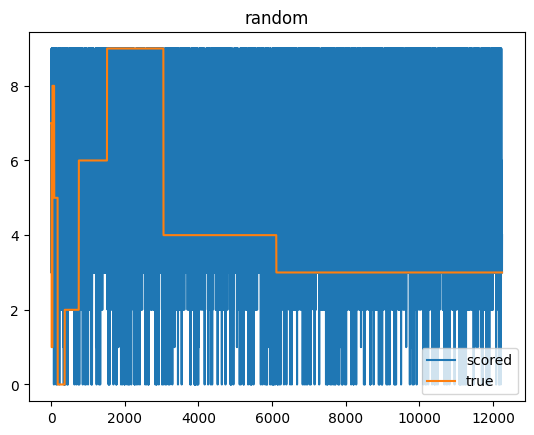

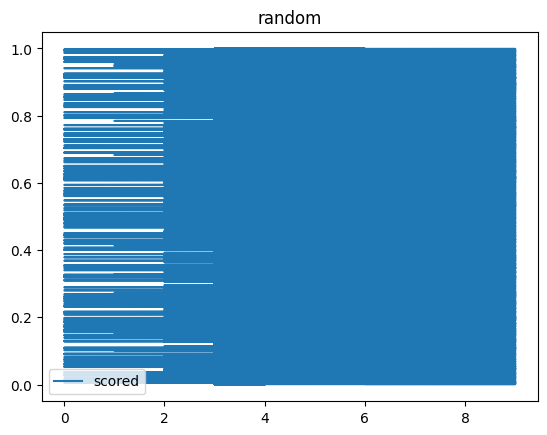

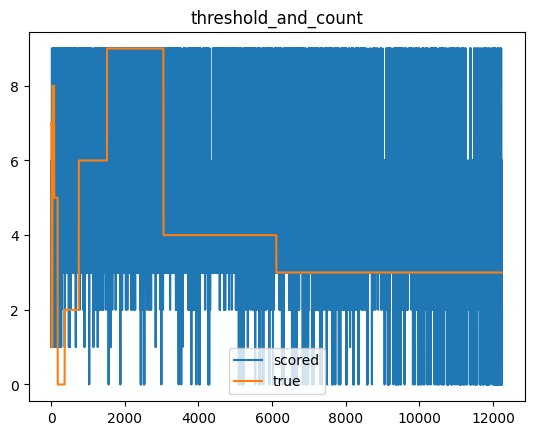

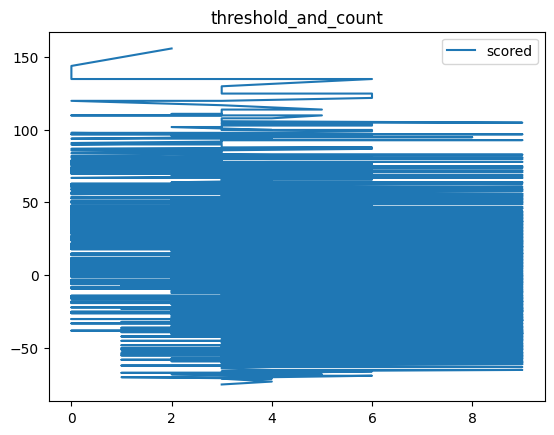

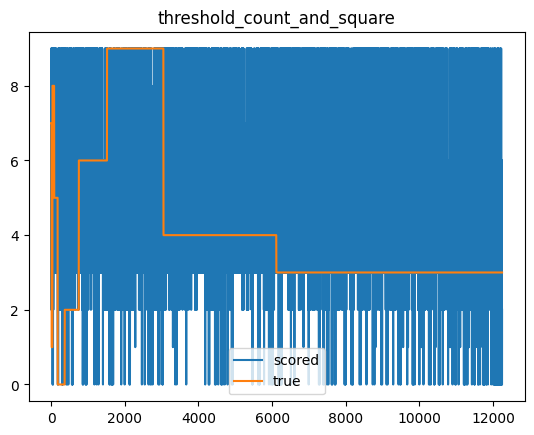

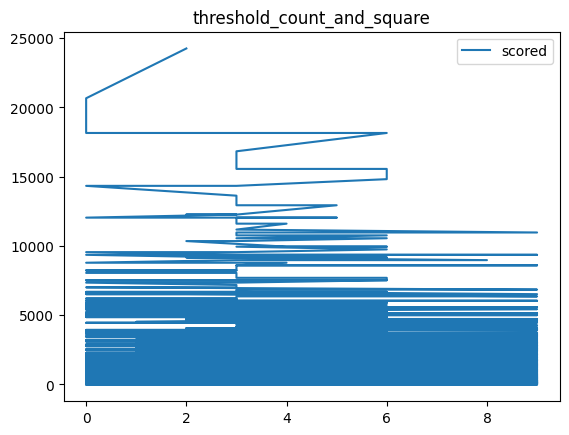

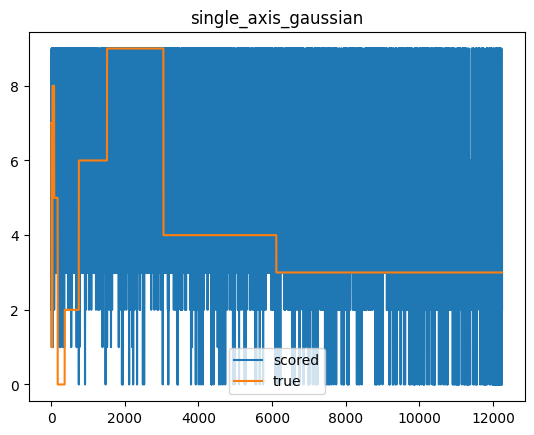

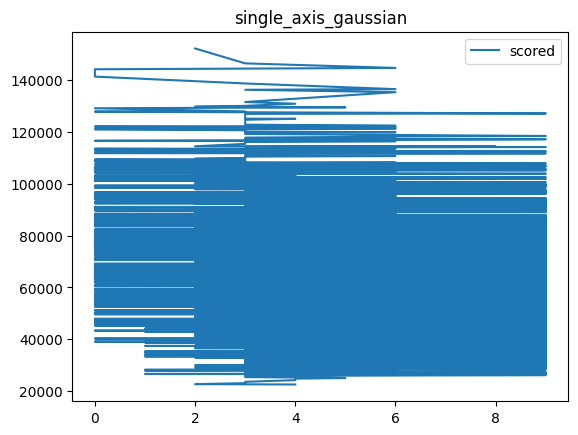

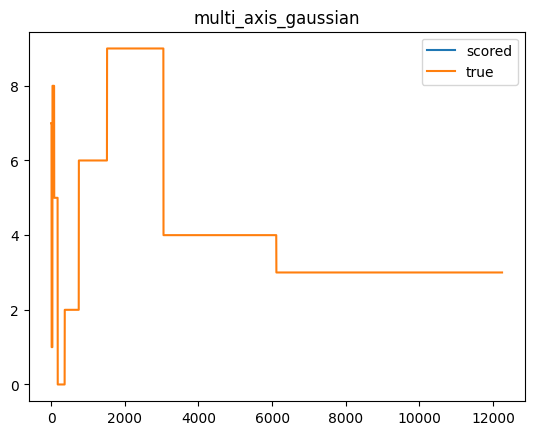

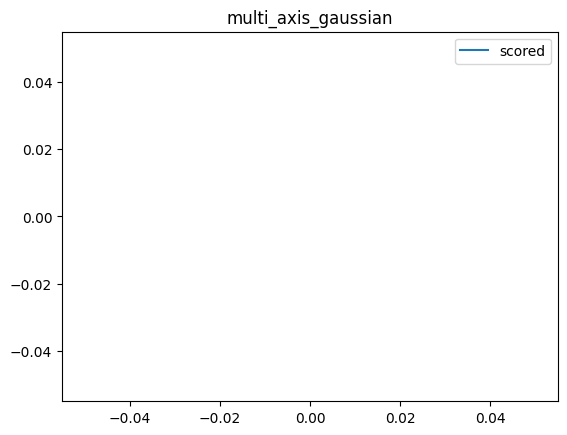

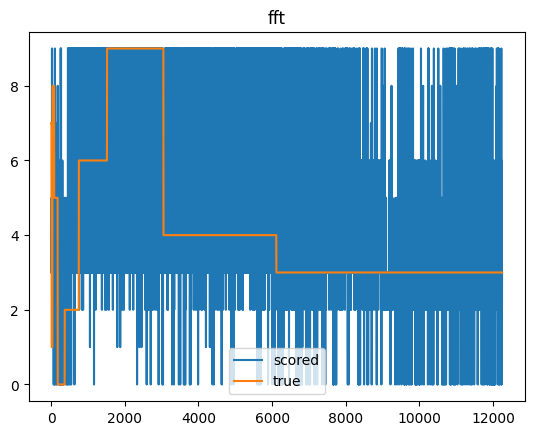

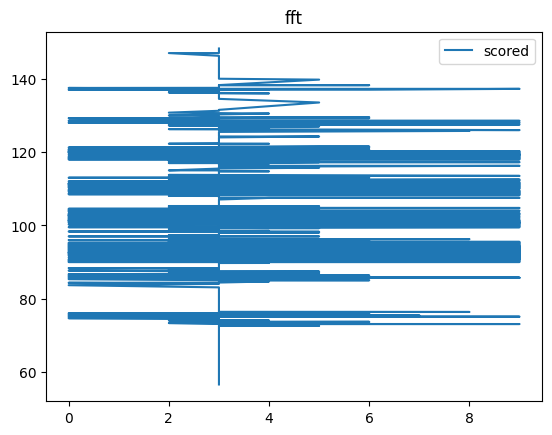

In [11]:

for key in scores.keys():    
    plt.plot(scores[key]['sorted_labels'], label='scored')
    plt.plot(scores[key]['true_labels'], label='true')
    plt.title(key)
    plt.legend()
    plt.show()

    plt.plot( scores[key]['sorted_labels'], scores[key]['sorted_scores'],label='scored')
    plt.title(key)
    plt.legend()
    plt.show()





In [12]:
print(scores['single_axis_gaussian'])

{'scores': array([53849.39766521, 74333.71325386, 54257.07144686, ...,
       55304.66834557, 53660.7335293 , 69493.70461686]), 'true_labels': array([7., 7., 7., ..., 3., 3., 3.]), 'sorted': [], 'sorted_labels': [4.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 5.0, 4.0, 3.0, 3.0, 3.0, 3.0, 9.0, 4.0, 3.0, 9.0, 1.0, 5.0, 9.0, 6.0, 9.0, 3.0, 6.0, 9.0, 4.0, 9.0, 4.0, 4.0, 6.0, 3.0, 6.0, 4.0, 3.0, 1.0, 3.0, 4.0, 5.0, 4.0, 3.0, 1.0, 4.0, 3.0, 3.0, 3.0, 9.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 9.0, 4.0, 3.0, 5.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 9.0, 3.0, 4.0, 3.0, 3.0, 9.0, 3.0, 9.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 9.0, 3.0, 3.0, 3.0, 4.0, 3.0, 9.0, 4.0, 4.0, 5.0, 4.0, 3.0, 3.0, 3.0, 9.0, 6.0, 3.0, 4.0, 4.0, 9.0, 3.0, 9.0, 9.0, 4.0, 4.0, 4.0, 9.0, 4.0, 4.0, 9.0, 3.0, 9.0, 3.0, 4.0, 4.0, 6.0, 3.0, 4.0, 3.0, 9.0, 6.0, 4.0, 9.0, 4.0, 4.0, 9.0, 3.0, 9.0, 9.0, 4.0, 3.0, 9.0, 9.0, 4.0, 3.0, 4.0, 3.0, 3.0, 9.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 4.0, 9.0, 4.0, 4.0, 3.

random {'scores': array([0.61014077, 0.82080535, 0.42982112, ..., 0.68408913, 0.97171802,
       0.13346695]), 'true_labels': array([7., 7., 7., ..., 3., 3., 3.]), 'sorted': [], 'sorted_labels': [4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 9.0, 3.0, 4.0, 6.0, 4.0, 4.0, 9.0, 4.0, 9.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 9.0, 3.0, 3.0, 4.0, 3.0, 9.0, 3.0, 4.0, 5.0, 3.0, 3.0, 3.0, 3.0, 9.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 9.0, 6.0, 9.0, 4.0, 3.0, 3.0, 9.0, 9.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 9.0, 0.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 9.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 9.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 9.0, 3.0, 4.0, 9.0, 6.0, 4.0, 3.0, 4.0, 6.0, 9.0, 4.0, 4.0, 3.0, 9.0, 3.0, 3.0, 3.0, 3.0, 3.0, 9.0, 3.0, 4.0, 4.0, 9.0, 3.0, 4.0, 4.0, 9.0, 9.0, 6.0, 4.0, 3.0, 6.0, 3.0, 4.0, 4.0, 3.0, 0.0, 9.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 8.0, 4.0, 2.0, 6.0, 3.0, 6.0, 3.0, 3.0, 6.0, 3.0, 6.0, 4.0, 3.0, 3.0,

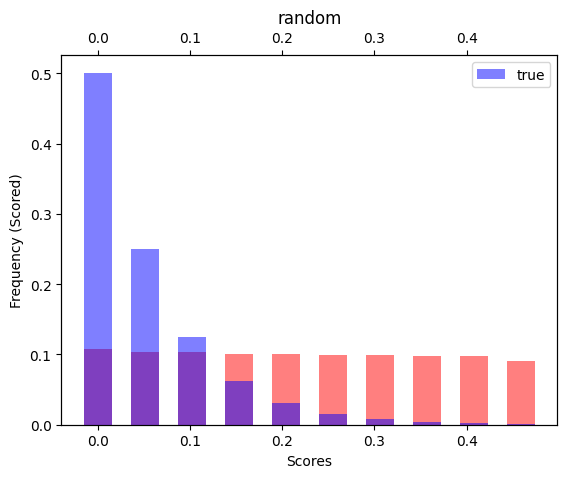

random accuracy: 0.4372754001960142
threshold_and_count {'scores': [-17.24648807579223, 21.75351192420777, -20.24648807579223, 7.753511924207771, -35.24648807579223, -6.246488075792229, 2.7535119242077712, -29.24648807579223, 19.75351192420777, -27.24648807579223, -20.24648807579223, -45.24648807579223, -32.24648807579223, -54.24648807579223, -51.24648807579223, -39.24648807579223, 10.753511924207771, -18.24648807579223, -70.24648807579223, -62.24648807579223, -23.24648807579223, -51.24648807579223, -67.24648807579223, -7.246488075792229, -36.24648807579223, -42.24648807579223, -53.24648807579223, -50.24648807579223, -58.24648807579223, -55.24648807579223, -39.24648807579223, -48.24648807579223, -45.24648807579223, -37.24648807579223, -14.246488075792229, -39.24648807579223, -39.24648807579223, 18.75351192420777, -2.2464880757922288, -0.24648807579222876, 41.75351192420777, -10.246488075792229, 8.753511924207771, -1.2464880757922288, 3.7535119242077712, 2.7535119242077712, 25.753511924

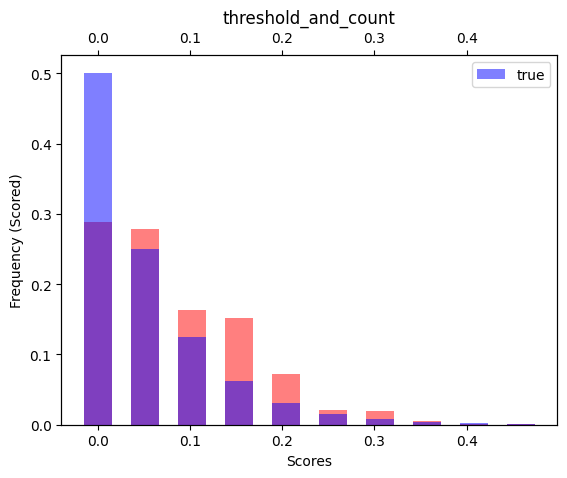

threshold_and_count accuracy: 0.7860993139496896
threshold_count_and_square {'scores': [297.4413509484435, 473.2152810366497, 409.9202794031969, 60.1169471588321, 1242.3149216769639, 39.0186132810145, 7.581827916754383, 855.357064767457, 390.2012333398186, 742.3711124642881, 409.9202794031969, 2047.2446831928085, 1039.8359932222104, 2942.6814685570685, 2626.202540102315, 1540.2868262833017, 115.63801870407872, 332.934327100028, 4934.56908698242, 3874.625277769744, 540.3992078579503, 2626.202540102315, 4522.090158527666, 52.51158943259896, 1313.8078978285482, 1784.765754738055, 2835.188492405484, 2524.7095639507306, 3392.6533731634063, 3052.174444708653, 1540.2868262833017, 2327.723611647562, 2047.2446831928085, 1387.3008739801328, 202.96242249369016, 1540.2868262833017, 1540.2868262833017, 351.69420949140306, 5.046708674676671, 0.06075637150775551, 1743.3557580049605, 104.99051788735233, 76.62397100724763, 1.553732523092213, 14.088851765169926, 7.581827916754383, 663.2433764303119, 110

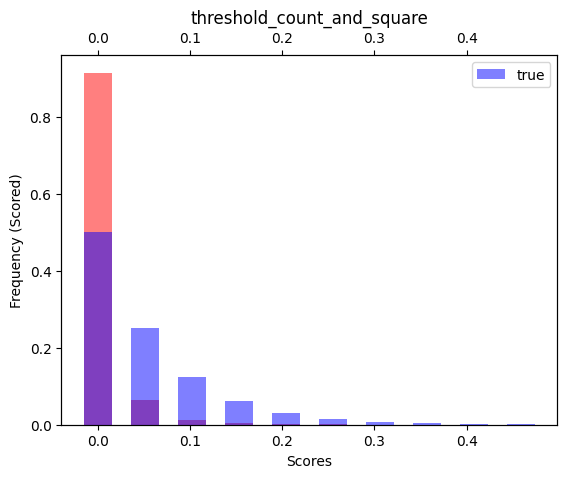

threshold_count_and_square accuracy: 0.5861646520744854
single_axis_gaussian {'scores': array([53849.39766521, 74333.71325386, 54257.07144686, ...,
       55304.66834557, 53660.7335293 , 69493.70461686]), 'true_labels': array([7., 7., 7., ..., 3., 3., 3.]), 'sorted': [], 'sorted_labels': [4.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 5.0, 4.0, 3.0, 3.0, 3.0, 3.0, 9.0, 4.0, 3.0, 9.0, 1.0, 5.0, 9.0, 6.0, 9.0, 3.0, 6.0, 9.0, 4.0, 9.0, 4.0, 4.0, 6.0, 3.0, 6.0, 4.0, 3.0, 1.0, 3.0, 4.0, 5.0, 4.0, 3.0, 1.0, 4.0, 3.0, 3.0, 3.0, 9.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 9.0, 4.0, 3.0, 5.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 9.0, 3.0, 4.0, 3.0, 3.0, 9.0, 3.0, 9.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 9.0, 3.0, 3.0, 3.0, 4.0, 3.0, 9.0, 4.0, 4.0, 5.0, 4.0, 3.0, 3.0, 3.0, 9.0, 6.0, 3.0, 4.0, 4.0, 9.0, 3.0, 9.0, 9.0, 4.0, 4.0, 4.0, 9.0, 4.0, 4.0, 9.0, 3.0, 9.0, 3.0, 4.0, 4.0, 6.0, 3.0, 4.0, 3.0, 9.0, 6.0, 4.0, 9.0, 4.0, 4.0, 9.0, 3.0, 9.0, 9.0, 4.0, 3.0, 9.0, 9.0, 4.0, 3.0, 4.0, 3.0, 

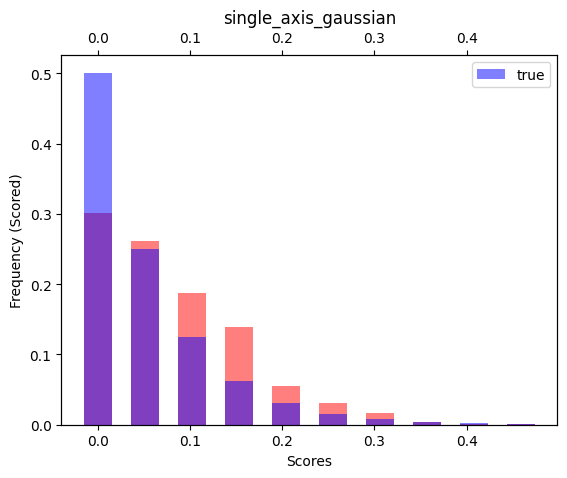

single_axis_gaussian accuracy: 0.7990852662528588
multi_axis_gaussian {'scores': 0, 'true_labels': array([7., 7., 7., ..., 3., 3., 3.]), 'sorted': [], 'sorted_labels': [0], 'accuracy': 0, 'sort_index': array([0], dtype=int64), 'sorted_scores': [0]}
ERROR:multi_axis_gaussian no accuracy value
fft {'scores': array([ 93.25894656,  94.80597569,  93.00869515, ...,  91.75235747,
       116.50195994, 102.25398579]), 'true_labels': array([7., 7., 7., ..., 3., 3., 3.]), 'sorted': [], 'sorted_labels': [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 9.0, 3.0, 2.0, 3.0, 6.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 6.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 5.

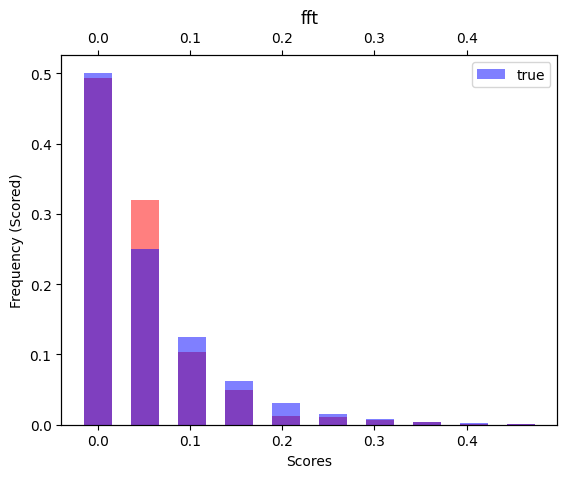

fft accuracy: 0.930578242404443


In [13]:
for key in scores.keys():    
    #check for proper length
    print(key, scores[key])
    if scores[key]['accuracy'] == 0:
        print(f'ERROR:{key} no accuracy value')
    else:

            bin_count = 10
            scores_counts, scores_bins = np.histogram(scores[key]['scores'], bins=bin_count, density=True)
            scores_counts = scores_counts / np.linalg.norm(scores_counts)
            scores_counts = scores_counts / np.sum(scores_counts)
            scores_bins = scores_bins / np.linalg.norm(scores_bins)

            #sort the histogram bars by scores_histogram[1]
            sort_index = np.argsort(scores_counts)[::-1]    
            scores_counts = np.array([scores_counts[sort_index[i]] for i in range(bin_count)])            
            #scores_bins = np.array([scores_bins[sort_index[i]] for i in range(bin_count)])
            print(scores_counts, scores_bins)                        
            labels_counts, labels_bins = np.histogram(scores[key]['true_labels'], bins=bin_count, density=True)
            labels_counts = labels_counts / np.linalg.norm(labels_counts)
            labels_counts = labels_counts / np.sum(labels_counts)
            labels_bins = labels_bins / np.linalg.norm(labels_bins)

            sort_index = np.argsort(labels_counts)[::-1]  
            #sort the histogram bars by true_labels_histogram[1]
            labels_counts = np.array([labels_counts[sort_index[i]] for i in range(bin_count)])
            #labels_bins = np.array([labels_bins[sort_index[i]] for i in range(bin_count)])
            print(labels_counts, labels_bins)

            fig, ax1 = plt.subplots()
            ax2 = ax1.twiny()
            ax1.bar(labels_bins[0:bin_count], scores_counts, label='scored', color='red', alpha= 0.5, width=0.03)
            ax2.bar(labels_bins[0:bin_count], labels_counts, label='true', color='blue', alpha= 0.5, width=0.03)
            ax1.set_xlabel('Scores')
            ax1.set_ylabel('Frequency (Scored)')
            ax2.set_ylabel('Frequency (True)')
            plt.title(key)
            plt.legend()

            # Sort the histogram bars
            #ax1.bar_label(ax1.containers[0], labels=[f'{int(h.get_height())}' for h in ax1.containers[0]], label_type='edge')
            #ax2.bar_label(ax2.containers[0], labels=[f'{int(h.get_height())}' for h in ax2.containers[0]], label_type='edge')

            plt.show()

            #calculate the accuracy of the histogram
            #sum the minimum of either scores_counts or labels_counts for the total set
            accuracy = np.sum(np.minimum(scores_counts, labels_counts))
            print(f'{key} accuracy: {accuracy}')
            

        

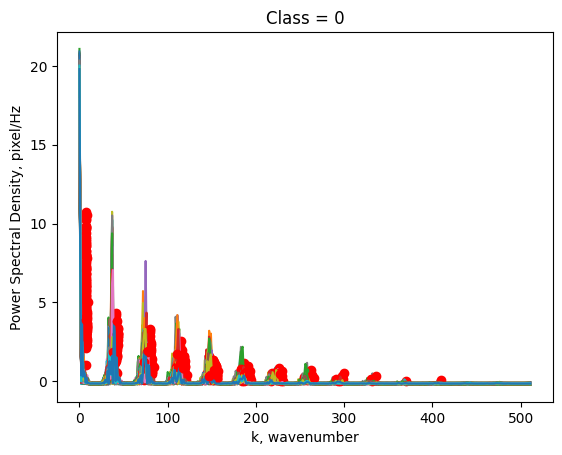

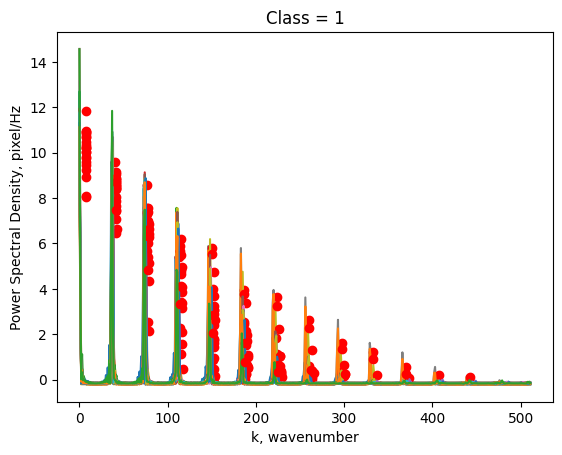

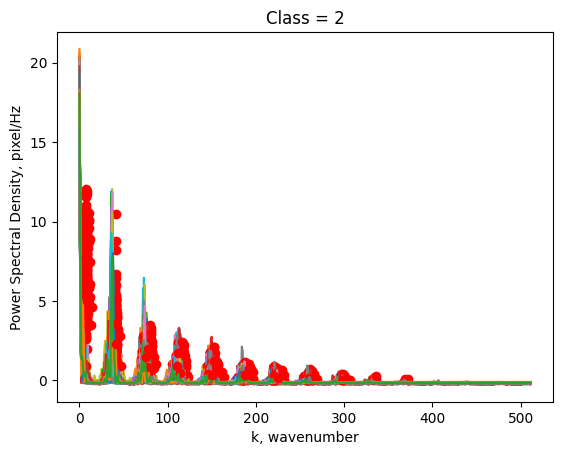

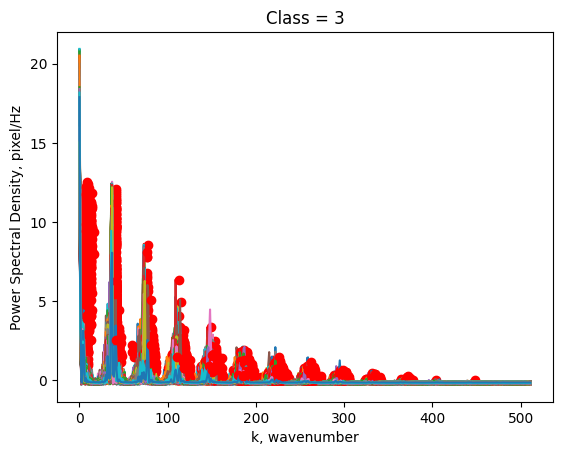

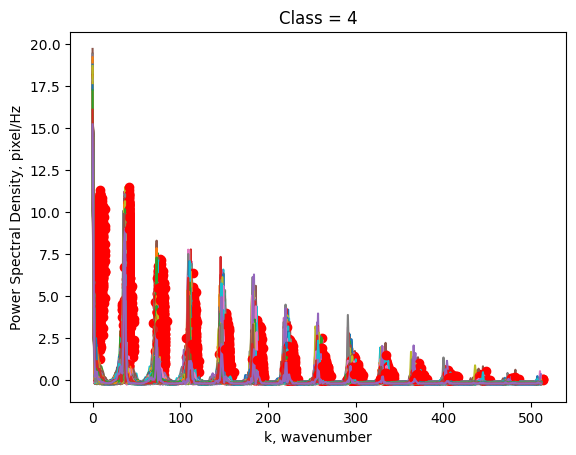

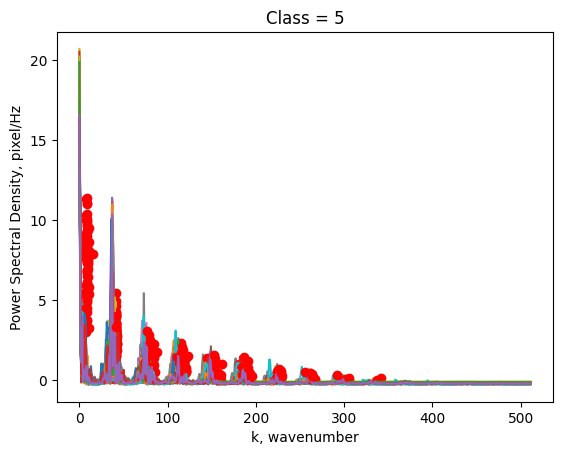

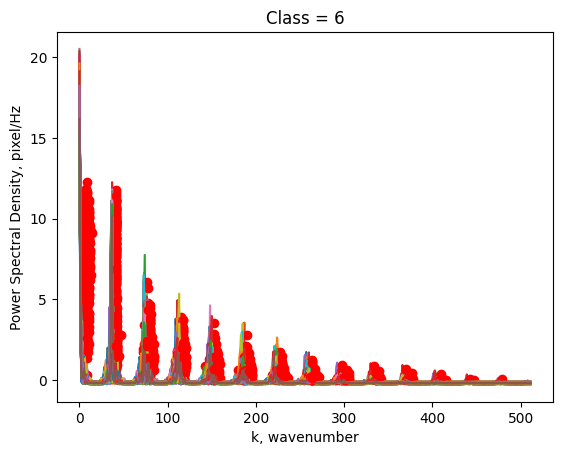

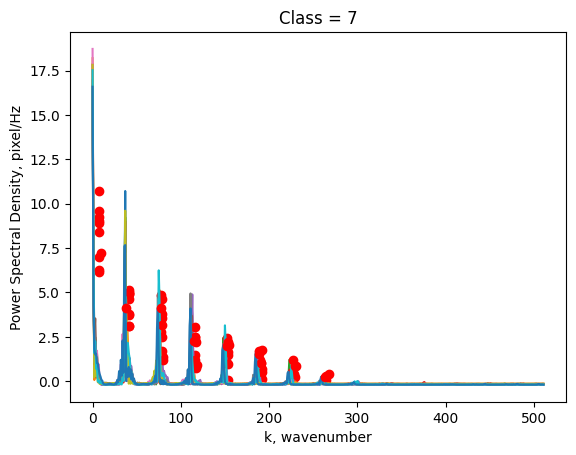

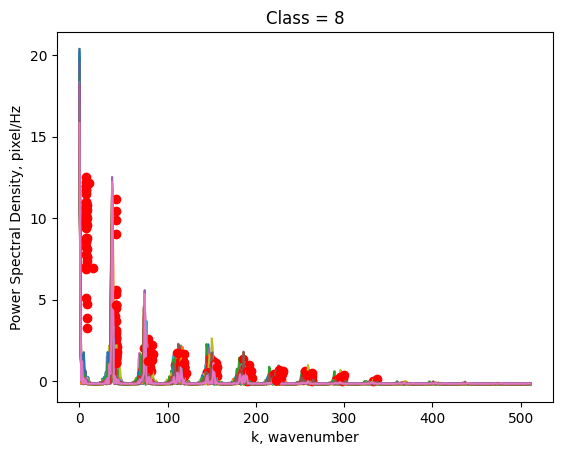

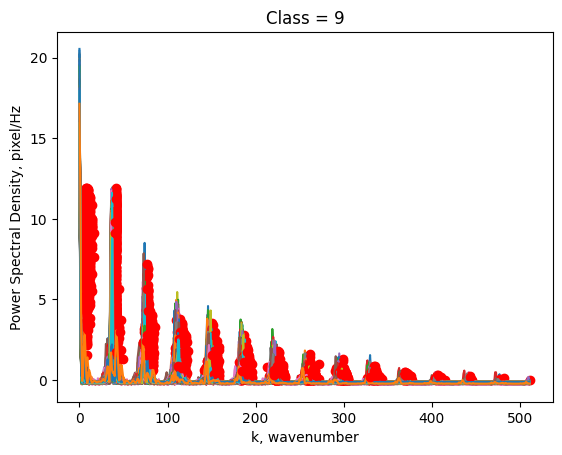

In [14]:
#pad data for 2^n requirement of FFT
X_pad = np.pad(X, ((0, 0), (0,252)), 'constant')

#calculate FFT and PSD
FFT_all=np.array([np.fft.fft(X_pad[i][0:1024]) for i in range(X_pad.shape[0])])
PSD_all = np.abs(FFT_all)**2  

#make graphs
fft_scores = np.zeros(FFT_all.shape[0])
score_index=0

for ix in range(0,10):
  for i, val in enumerate(y):
    if val == ix:
      # Z-score standardization
      data = PSD_all[i][0:512]
      data = data - np.mean(data)
      data = data / np.std(data)

      #slice data to leave off first and last
      
      peaks = find_peaks(data[1:], height = 0, threshold=0.1, distance=20)
 
      peak_values = np.array([peaks[1]['peak_heights'][i] for i in range(peaks[0].shape[0])])
      peaks = peaks[0]+5

      #choose the top 5 peaks
      peak_values = peak_values[np.argsort(peak_values)[:12]][::-1]
      peaks = peaks[np.argsort(peak_values)[:12]][::-1]

      anom_x = np.average(peaks)
      anom_y = np.average(peak_values)

      #calculate distance from origin to anom_x, anom_y    
      fft_scores = np.append(fft_scores, np.sqrt(anom_x**2 + anom_y**2) ) 
      plt.plot(data)
      plt.plot(peaks, peak_values, "o", color="red")

  plt.title(f'Class = {ix}')
  plt.ylabel('Power Spectral Density, pixel/Hz')
  plt.xlabel('k, wavenumber')
  plt.savefig(f'fft_{ix}.png')
  plt.show()
      
     

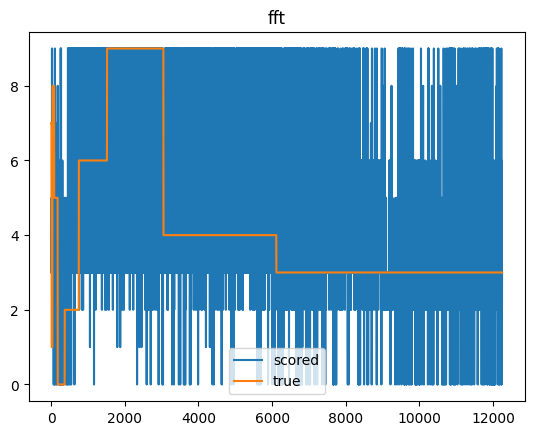

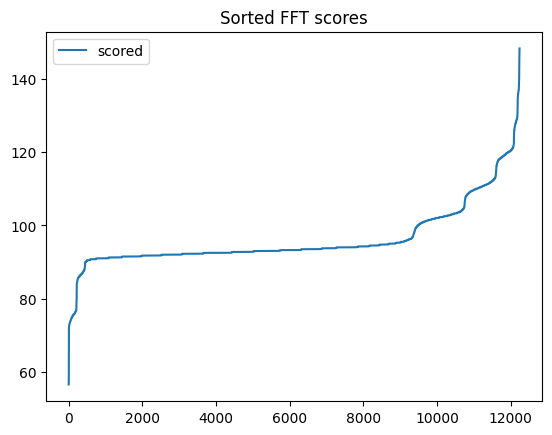

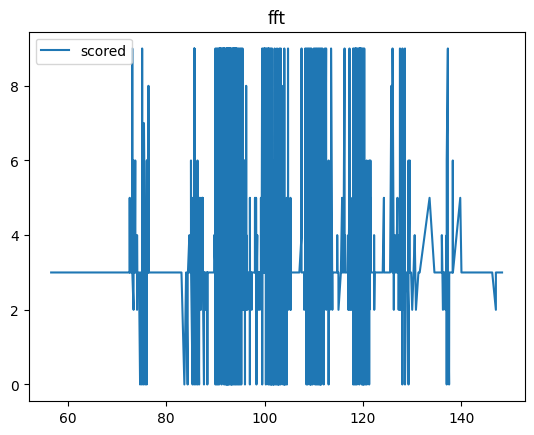

In [15]:
plt.plot(scores['fft']['sorted_labels'], label='scored')
plt.plot(scores['fft']['true_labels'], label='true')
plt.title('fft')
plt.legend()
plt.show()

plt.plot( scores['fft']['sorted_scores'],label='scored')
plt.title('Sorted FFT scores')
plt.legend()
plt.show()

plt.plot( scores['fft']['sorted_scores'], scores['fft']['sorted_labels'],label='scored')
plt.title('fft')
plt.legend()
plt.show()





In [16]:
def setup_fft(X):
    #pad data for 2^n requirement of FFT
    X1 = np.pad(X, ((0, 0), (0,252)), 'constant')
    
    #calculate FFT and PSD
    FFT_all=np.array([np.fft.fft(X1[i][0:1024]) for i in range(X1.shape[0])])
    PSD_all = np.abs(FFT_all)**2    

    return PSD_all


def bf_fft(PSD_all, height=0, threshold=0, distance=10, dc_offset=0, peak_count=12):
    scores = np.array([])

    for i in range(PSD_all.shape[0]):        
        # min-max standardization
        data = PSD_all[i][0:512]   
        data = data - np.mean(data)
        data = data / np.std(data)

        #peaks = find_peaks(data[6:], height = 0.005, threshold=0.02, distance=10)     
        #peak_values = np.array([data[peaks[0][i]] for i in range(peaks[0].shape[0])])
        peaks = find_peaks(data[dc_offset:], height = height, threshold=threshold, distance=distance)
 
        peak_values = np.array([peaks[1]['peak_heights'][i] for i in range(peaks[0].shape[0])])
        peaks = peaks[0]+dc_offset

        #choose the top peak_count peaks
        peak_values = peak_values[np.argsort(peak_values)[:peak_count]][::-1]
        peaks = peaks[np.argsort(peak_values)[:peak_count]][::-1]

        anom_x = np.average(peaks)
        anom_y = np.average(peak_values)
                
        anom_x = np.average(peaks)
        anom_y = np.average(peak_values)

        #calculate distance from origin to anom_x, anom_y    
        scores = np.append(scores, np.sqrt(anom_x**2 + anom_y**2) )             
    return scores

In [17]:
import datetime
#this cell is going to iterate through the parameters to find the best accuracy
#it will then store the best parameters in a dictionary
optimize = False
#def score_fft(X, height=0, threshold=0, distance=10, dc_offset=0, peak_count=12):
if(optimize):
    simulation_bounds = {'height':(0,3), 'threshold':(0,3), 'distance':(37,34), 'dc_offset':(35,14), 'peak_count':(3,6)}
    simulation_steps = {'height':1, 'threshold':1, 'distance':-1, 'dc_offset':-3, 'peak_count':1}

    #loop through all parameters

    height_linspace = np.arange(simulation_bounds['height'][0], simulation_bounds['height'][1], simulation_steps['height'])
    threshold_linspace = np.arange(simulation_bounds['threshold'][0], simulation_bounds['threshold'][1], simulation_steps['threshold'])
    distance_linspace = np.arange(simulation_bounds['distance'][0], simulation_bounds['distance'][1], simulation_steps['distance'])
    dc_offset_linspace = np.arange(simulation_bounds['dc_offset'][0], simulation_bounds['dc_offset'][1], simulation_steps['dc_offset'])
    peak_count_linspace = np.arange(simulation_bounds['peak_count'][0], simulation_bounds['peak_count'][1], simulation_steps['peak_count'])

    psd_data = setup_fft(X)
        #loop through all values of the parameter
            
    for height_val in height_linspace:
        for threshold_val in threshold_linspace:    
            for dc_offset_val in dc_offset_linspace:                
                for distance_val in distance_linspace:
                    for peak_count_val in peak_count_linspace:                    
                        #calculate the accuracy for the current parameter values
                        score = bf_fft(psd_data, height_val, threshold_val, distance_val, dc_offset_val, peak_count_val)

                        score_index = np.argsort(score)
                        #sorted_scores = [score[score_index] for i in range(len(score_index))]        
                        sorted_labels = [y[score_index][i] for i in range(len(score_index))]
                        accuracy = get_accuracy(y, sorted_labels)
                        #print the accuracy and parameter values
                        print(f'time:{datetime.datetime.now()} accuracy: {accuracy} {height_val=} {threshold_val=} {distance_val=} {dc_offset_val=} {peak_count_val=}')

                        #if the accuracy is better than the current best accuracy, store the accuracy and parameter values
                        if accuracy > best_accuracy:
                            best_accuracy = accuracy
                            best_parameter = (height_val, threshold_val, distance_val, dc_offset_val, peak_count_val)
            

